# Part 1 -  Does Renovation Effect House Price?

Here we will Ask 3 question:
    1. Does the house price go down as the age of the building increase?
    2. Does the the house price go down as time since renovation increases?
    3. If the house was not renovated:
           ->  Does the house price decrecre more than if it would have been renovated.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('kc_house_data_clean.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,long,sqft_living15,sqft_lot15,year,month,day,month_year,price_bands,price_list_level,yr_built_bands
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,...,-122.257,1340,5650,2014,10,13,13-2014,200K to 300K,3,1950
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,-122.319,1690,7639,2014,12,9,9-2014,500K to 600K,6,1950
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,-122.233,2720,8062,2015,2,25,25-2015,100K to 200K,2,1930
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,-122.393,1360,5000,2014,12,9,9-2014,600K to 700K,7,1960
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,-122.045,1800,7503,2015,2,18,18-2015,500K to 600K,6,1980


In [3]:
feilds = list(df.columns)
feilds

['Unnamed: 0',
 'id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'year',
 'month',
 'day',
 'month_year',
 'price_bands',
 'price_list_level',
 'yr_built_bands']

In [4]:
df.corr()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,price_list_level,yr_built_bands
Unnamed: 0,1.000000,0.006733,0.027465,0.009061,0.107139,0.044934,-0.027167,0.180107,-0.007696,-0.013357,...,-0.002022,0.000833,0.008847,0.026768,-0.030302,-0.001466,0.001490,0.002947,0.034696,0.198394
id,0.006733,1.000000,-0.016776,0.002322,0.005126,-0.012272,-0.131923,0.018564,-0.003603,0.011758,...,-0.008214,-0.001794,0.020637,-0.002748,-0.138570,0.009882,-0.011585,0.002197,-0.006079,0.020660
price,0.027465,-0.016776,1.000000,0.315950,0.525886,0.701915,0.089874,0.256789,0.264310,0.393498,...,-0.053479,0.306628,0.022028,0.585247,0.082852,0.003704,-0.009950,-0.014644,0.822727,0.055349
bedrooms,0.009061,0.002322,0.315950,1.000000,0.527870,0.593176,0.033599,0.183694,-0.002056,0.080736,...,-0.158624,-0.011637,0.136554,0.404524,0.031893,-0.009159,-0.000802,-0.009514,0.342545,0.160627
bathrooms,0.107139,0.005126,0.525886,0.527870,1.000000,0.755741,0.088363,0.502547,0.063625,0.186000,...,-0.204895,0.024160,0.224872,0.569850,0.088303,-0.026640,0.007506,-0.005065,0.518502,0.505856
sqft_living,0.044934,-0.012272,0.701915,0.593176,0.755741,1.000000,0.173446,0.353913,0.104634,0.281703,...,-0.199876,0.052083,0.241186,0.756388,0.184343,-0.029064,0.012084,-0.007331,0.669371,0.318483
sqft_lot,-0.027167,-0.131923,0.089874,0.033599,0.088363,0.173446,1.000000,-0.004830,0.021457,0.075050,...,-0.129598,-0.085531,0.230220,0.144752,0.718204,0.005616,-0.002596,0.000271,0.102090,0.054515
floors,0.180107,0.018564,0.256789,0.183694,0.502547,0.353913,-0.004830,1.000000,0.020790,0.028389,...,-0.059587,0.049195,0.125897,0.280041,-0.010733,-0.022412,0.014216,-0.006396,0.297807,0.489031
waterfront,-0.007696,-0.003603,0.264310,-0.002056,0.063625,0.104634,0.021457,0.020790,1.000000,0.380543,...,0.028921,-0.012163,-0.037633,0.083820,0.030657,-0.005023,0.008197,0.013728,0.128953,-0.023974
view,-0.013357,0.011758,0.393498,0.080736,0.186000,0.281703,0.075050,0.028389,0.380543,1.000000,...,0.085050,0.006304,-0.077722,0.278914,0.073080,0.001219,-0.005171,0.010671,0.325519,-0.053845


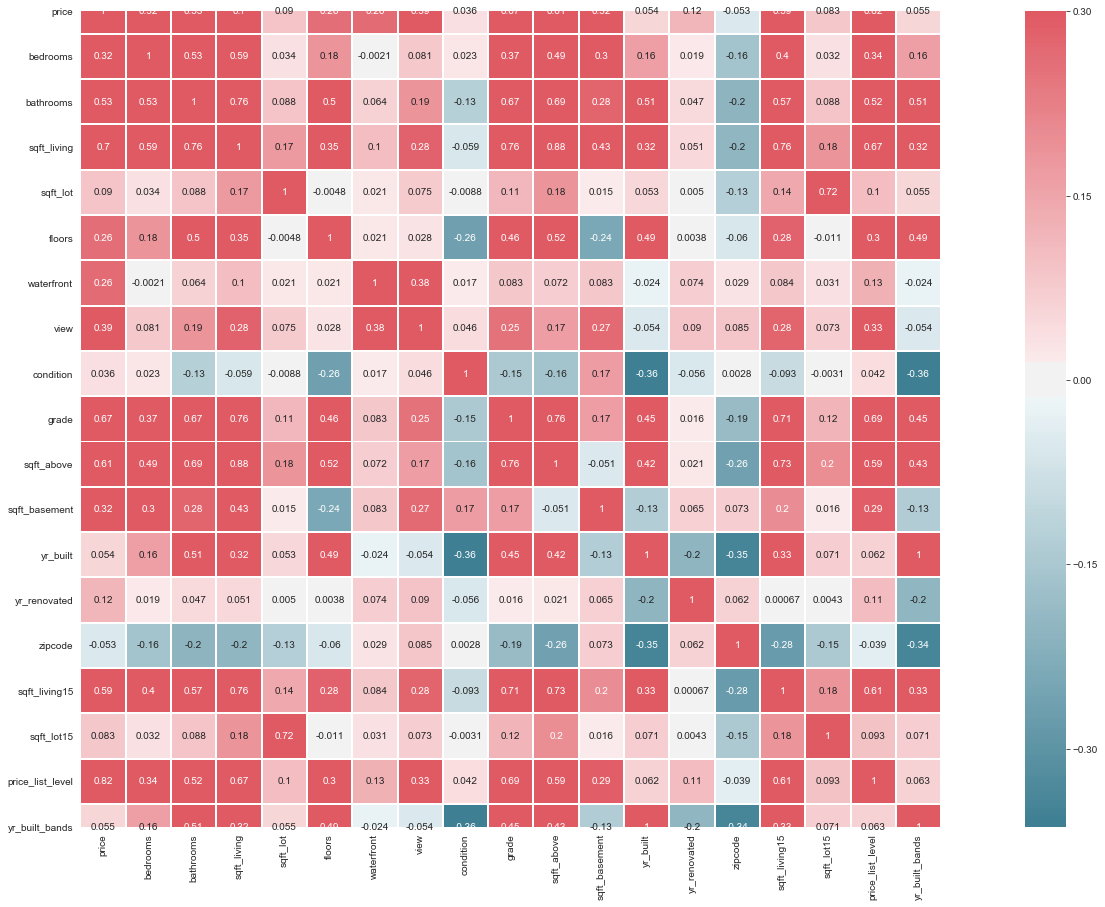

In [5]:
df_corr_heatmap = df.drop(columns=['Unnamed: 0', 'id', 'lat', 'long', 'year', 'month', 'day',])
corr = df_corr_heatmap.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=1, cbar_kws={"shrink": 1})

In [6]:
# corr = df_corr_heatmap.corr()['price'].sort_values(ascending=False)
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# fig, ax = plt.subplots(figsize=(30, 15))
# ax = sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
#             square=True, linewidths=1, cbar_kws={"shrink": 1})

## Add in Correlation Calculator

In [7]:
def mean_normalize(var):
    norm = []
    
    mean = sum(var)/len(var)
    
    for i in var:
        norm.append(i-mean)
    
    return norm

def dot_product(x, y):
    prodcut = 0
    
    for i in range(len(x)):
        prd = x[i]*y[i]
        prodcut += prd
    return prodcut

def covariance(var1, var2):
    n = len(var1)
    x = mean_normalize(var1)
    y = mean_normalize(var2)
    
    dot_product(x, y)
    
def correlation(var1, var2): # Calculates the "r" value.
    
    if len(var1) != len(var2):
        return 'The lengths of both the lists should be equal.' 
    else: 
       
        mean_norm_var1 = mean_normalize(var1)
        mean_norm_var2 = mean_normalize(var2)
        
        var1_dot_var2 = dot_product(mean_norm_var1, mean_norm_var2)
        
        var1_squared = [i * i for i in mean_norm_var1]
        var2_squared = [i * i for i in mean_norm_var2]
        
        return round(var1_dot_var2 / math.sqrt(sum(var1_squared) * sum(var2_squared)), 3)

## Add Regrestion Line Calculator

In [73]:
def calc_slope(xs, ys):

    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

def calc_intercept(xs, ys):

    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return c

def reg_line (m, c, X):
    
    return [(m*x)+c for x in X]

def sum_sq_err(ys_real, ys_predicted):

    sse =  sum((ys_predicted - ys_real) * (ys_predicted - ys_real))
    
    return sse

def r_squared(ys_real, ys_predicted):
    
    # Calculate Y_mean , squared error for regression and mean line , and calculate r-squared
    y_mean = [np.mean(ys_real) for y in ys_real]

    sq_err_reg = sum_sq_err(ys_real, ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    # Calculate r-squared 
    r_sq =  1 - (sq_err_reg/sq_err_y_mean)
    
    return r_sq

def reg_basic_and_plot(X, Y, title, X_Lable, Y_Lable):
    
    m = calc_slope(X,Y)
    c = calc_intercept(X,Y)
    Y_pred = reg_line(m, c, X)
    r = correlation(X,Y)
    r_sqrd = r_squared(Y,Y_pred)
    
    print ('Basic Regression Diagnostics')
    print ('----------------------------')
    print ('Sample Size:', len(X))
    print ('Slope:', round(m, 3))
    print ('Y-Intercept:', round(c, 3))
    print ('Correlation:', r)
    print ('R-Squared:', round(r_sqrd, 3))
    print ('----------------------------')
    print ('Model: Y =',round(m, 2),'* X +', round(c, 2))
    
    plt.figure(figsize=(15,10))
    plt.scatter(X, Y, color='#003F72', label='data')
    plt.plot(X, Y_pred, label='regression line')
    plt.xlabel(X_Lable)
    plt.ylabel(Y_Lable)
    plt.title(title)
    plt.legend(loc=2)
    plt.show()
    return None

def compare_reg_basic_and_plot(X, Y, L, P, title, X_Lable, Y_Lable):
    
    # X & Y Results
    m1 = calc_slope(X,Y)
    c1 = calc_intercept(X,Y)
    Y_pred = reg_line(m1, c1, X)
    r1 = correlation(X,Y)
    r_sqrd1 = r_squared(Y,Y_pred)
    
    print ('Data_1 Regression Diagnostics')
    print ('----------------------------')
    print ('Sample Size:', len(X))
    print ('Slope:', round(m1, 2))
    print ('Y-Intercept:', round(c1, 2))
    print ('Correlation:', r1)
    print ('R-Squared:', round(r_sqrd1, 3))
    print ('----------------------------')
    print ('Model: Y =',round(m1, 2),'* X +', round(c1, 2))
    
    # L & P Results
    m2 = calc_slope(L,P)
    c2 = calc_intercept(L,P)
    P_pred = reg_line(m2, c2, L)
    r2 = correlation(X,Y)
    r_sqrd2 = r_squared(Y,Y_pred)
    
    print ('\n\nData_2 Regression Diagnostics')
    print ('----------------------------')
    print ('Sample Size:', len(L))
    print ('Slope:', round(m2, 2))
    print ('Y-Intercept:', round(c2, 2))
    print ('Correlation:', r2)
    print ('R-Squared:', round(r_sqrd2, 3))
    print ('----------------------------')
    print ('Model: Y =',round(m2, 2),'* X +', round(c2, 2))
    
    
    
    plt.figure(figsize=(15,10))
    plt.scatter(X, Y, color='blue', label='Data_1')
    plt.plot(X, Y_pred, label='regression line_1')
    plt.scatter(L, P, color='orange', label='Data_2')
    plt.plot(L, P_pred, label='regression line_2')
    plt.xlabel(X_Lable)
    plt.ylabel(Y_Lable)
    plt.title(title)
    plt.legend(loc=2)
    plt.show()
    return None

## Create:  "age" column

In [9]:
now = 2016

In [10]:
df['age'] = now - df['yr_built']

## Create a column Renovated Yes/No

In [11]:
is_renovated = df['yr_renovated']
is_renovated.describe().apply(lambda x: format(x, 'f'))
temp = []
for ren in is_renovated:
    if ren > 0:
        temp.append('renovated')
    else:
        temp.append('not_renovated')
        
df['is_ren'] = temp
        

In [12]:
df['is_ren'].unique()

array(['not_renovated', 'renovated'], dtype=object)

# Create: Sale Count column
        - shows if this property is on the list mulitiple times

In [13]:
# dup_houses_count = dup_counter(df['id'])
# print(len(dup_houses_count))
# dup_houses_count[:5]

Create a new DataFrame soreted by Date sold.

In [14]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,year,month,day,month_year,price_bands,price_list_level,yr_built_bands,age,is_ren
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,...,5650,2014,10,13,13-2014,200K to 300K,3,1950,61,not_renovated
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,7639,2014,12,9,9-2014,500K to 600K,6,1950,65,renovated
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,8062,2015,2,25,25-2015,100K to 200K,2,1930,83,not_renovated
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,5000,2014,12,9,9-2014,600K to 700K,7,1960,51,not_renovated
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,7503,2015,2,18,18-2015,500K to 600K,6,1980,29,not_renovated


In [15]:
df_sorted_date = df

In [16]:
pd.to_datetime(df_sorted_date['date'], format='%Y%m%d', errors='ignore')

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21590     5/21/2014
21591     2/23/2015
21592     6/23/2014
21593     1/16/2015
21594    10/15/2014
Name: date, Length: 21595, dtype: object

In [17]:
df_sorted_date.set_index('date', inplace=True)

In [18]:
df_sorted_date.sort_index(ascending=False, inplace=True)

Create list of unique values:

In [19]:
unique_ids = list(df['id'].unique())
unique_ids[:4]

[7227800055, 1421069123, 3323069084, 7227500450]

Add a counter column to the datalist:

In [20]:
def id_with_counter(data):
    dup_dict = {}
    values = sorted(list(map(lambda x: x, data)))
    
    for val in values:
            dup_dict[val] = 1

    return dup_dict

In [21]:
unique_ids_dict = id_with_counter(unique_ids)
unique_ids_dict[1000102]

1

Now we use this to iterate through the DataFrame list of id's. If it finds the id it; 

first appends the number next to the unique_id list
the added 1 to that number.

In [22]:
def ocurrance_finder(data, unique_dict):
    new_list = []
    
    for d in data:
        for u, v in unique_dict.items():
            if d == u:
                new_list.append(v)
                unique_dict[u] += 1
    return new_list

Apply occurance finder to the soreted data set.

In [23]:
sale_count_list = ocurrance_finder(df_sorted_date['id'], unique_ids_dict)
print(len(sale_count_list))
df_sorted_date.shape

21595


(21595, 30)

In [24]:
df_sorted_date['sale_count'] = sale_count_list

In [25]:
df_sorted_date.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,year,month,day,month_year,price_bands,price_list_level,yr_built_bands,age,is_ren,sale_count
date,,,,,,,,,,,,,,,,,,,,,
9/9/2014,10904,7227800055,199500.0,4,2.00,1750,8116,1.0,0.0,0.0,...,2014,9,9,9-2014,100K to 200K,2,1940,73,not_renovated,1
9/9/2014,12826,1421069123,214000.0,3,1.00,1020,9147,1.0,0.0,0.0,...,2014,9,9,9-2014,200K to 300K,3,1900,116,renovated,1
9/9/2014,1322,3323069084,620000.0,4,2.50,1840,220308,2.0,0.0,0.0,...,2014,9,9,9-2014,600K to 700K,7,2000,16,not_renovated,1
9/9/2014,8204,7227500450,222900.0,2,1.00,860,5800,1.0,0.0,0.0,...,2014,9,9,9-2014,200K to 300K,3,1940,74,not_renovated,1
9/9/2014,18353,1370803445,1140000.0,4,1.75,3080,6500,1.0,0.0,0.0,...,2014,9,9,9-2014,900K to 1M,10,1940,75,not_renovated,1


In [26]:
df_sorted_date['sale_count'].unique()

array([1, 2, 3])

### Using this, can we see if a house which has been sold for a second time has had a renovation done? And has that had an efect on its price.

This is probable done by extracting the id's which occure multiple times into a new data frame.

    1. Create a list id's of the duplicated ids
    2. Use list to extract 

In [27]:
def dup_counter(data):
    dup_dict = {}
    dup_list = []
    values = sorted(list(map(lambda x: x, data)))
    
    for val in values:
        if val in dup_dict: 
            dup_dict[val] += 1
        else:
            dup_dict[val] = 1

    sorted_dup_dict = sorted(dup_dict.items(), key = lambda x: x[1], reverse = True)
    dup_temp = list(sorted_dup_dict)
    
    for d in dup_temp:
        if d[1] > 1:
            dup_list.append(d)
    return dup_list


In [28]:
dup_ids_list = dup_counter(df['id'])
dup_ids_list[:4]

[(795000620, 3), (1000102, 2), (7200179, 2), (109200390, 2)]

In [29]:
def just_ids(data):
    new_list = []
    for d in dup_ids_list:
        new_list.append(d[0])
    return new_list

In [30]:
dup_ids = just_ids(dup_ids_list)

In [31]:
dup_ids[:4]

[795000620, 1000102, 7200179, 109200390]

In this we will try to extract the ids in this list to a new DataFrame:

In [32]:
df_multi_sale = df_sorted_date[df_sorted_date['id'].isin(dup_ids)]

In [33]:
df_multi_sale.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,year,month,day,month_year,price_bands,price_list_level,yr_built_bands,age,is_ren,sale_count
date,,,,,,,,,,,,,,,,,,,,,
9/9/2014,10904,7227800055,199500.0,4,2.0,1750,8116,1.0,0.0,0.0,...,2014,9,9,9-2014,100K to 200K,2,1940,73,not_renovated,1
9/9/2014,1127,8062900070,272000.0,5,1.5,2550,6300,1.0,0.0,0.0,...,2014,9,9,9-2014,200K to 300K,3,1950,57,not_renovated,1
9/5/2014,5966,1545800290,215000.0,4,2.5,1700,6675,2.0,0.0,0.0,...,2014,9,5,5-2014,200K to 300K,3,1990,19,not_renovated,1
9/5/2014,3619,2767602141,525000.0,3,1.5,1380,4290,1.0,0.0,0.0,...,2014,9,5,5-2014,500K to 600K,6,1950,61,not_renovated,1
9/5/2014,10261,1450100390,125000.0,3,1.0,920,7314,1.0,0.0,0.0,...,2014,9,5,5-2014,100K to 200K,2,1960,56,not_renovated,1


In [58]:
df_multi_sale.shape

(353, 31)

In [63]:
df_mulit_sale_1 = df_multi_sale.loc[df_multi_sale['sale_count'] == 1]
df_mulit_sale_1.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,year,month,day,price_list_level,yr_built_bands,age,sale_count
count,176.000000,1.760000e+02,1.760000e+02,176.000000,176.000000,176.000000,176.000000,176.000000,176.0,176.000000,...,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0
mean,10207.505682,4.545319e+09,3.930217e+05,3.284091,1.805398,1743.920455,11665.380682,1.267045,0.0,0.136364,...,-122.237523,1777.170455,10673.386364,2014.295455,6.170455,16.488636,4.244318,1955.284091,56.238636,1.0
std,5643.429923,2.875605e+09,2.929008e+05,1.030383,0.736875,757.734197,22861.807303,0.433912,0.0,0.662149,...,0.130698,611.692896,16489.243128,0.457549,2.104263,8.613603,2.160019,25.274018,25.622755,0.0
min,93.000000,1.000102e+06,8.500000e+04,1.000000,0.750000,580.000000,1092.000000,1.000000,0.0,0.000000,...,-122.463000,810.000000,1334.000000,2014.000000,2.000000,1.000000,1.000000,1900.000000,3.000000,1.0
25%,5711.750000,1.989975e+09,2.231250e+05,3.000000,1.000000,1220.000000,5544.250000,1.000000,0.0,0.000000,...,-122.337250,1360.000000,6000.000000,2014.000000,5.000000,8.000000,3.000000,1940.000000,38.000000,1.0
50%,10244.000000,4.085211e+09,3.129750e+05,3.000000,1.750000,1620.000000,8011.500000,1.000000,0.0,0.000000,...,-122.284000,1610.000000,7950.000000,2014.000000,6.000000,18.000000,4.000000,1950.000000,57.000000,1.0
75%,14971.750000,7.433280e+09,4.576250e+05,4.000000,2.250000,2080.000000,10110.000000,1.500000,0.0,0.000000,...,-122.172000,2020.000000,9587.250000,2015.000000,8.000000,24.000000,5.000000,1970.000000,73.000000,1.0
max,21565.000000,9.834201e+09,1.900000e+06,6.000000,4.500000,5290.000000,224442.000000,3.000000,0.0,4.000000,...,-121.734000,4060.000000,183897.000000,2015.000000,12.000000,31.000000,10.000000,2010.000000,116.000000,1.0


In [64]:
df_mulit_sale_2 = df_multi_sale.loc[df_multi_sale['sale_count'] == 2]
df_mulit_sale_2.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,year,month,day,price_list_level,yr_built_bands,age,sale_count
count,176.000000,1.760000e+02,1.760000e+02,176.000000,176.000000,176.000000,176.000000,176.000000,176.0,176.000000,...,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0
mean,10207.852273,4.545319e+09,4.479699e+05,3.284091,1.805398,1743.920455,11665.380682,1.267045,0.0,0.136364,...,-122.237523,1777.170455,10673.386364,2014.562500,6.136364,15.215909,4.772727,1955.284091,56.238636,2.0
std,5643.437914,2.875605e+09,2.947436e+05,1.030383,0.736875,757.734197,22861.807303,0.433912,0.0,0.662149,...,0.130698,611.692896,16489.243128,0.497494,4.216110,8.387676,2.217990,25.274018,25.622755,0.0
min,94.000000,1.000102e+06,8.200000e+04,1.000000,0.750000,580.000000,1092.000000,1.000000,0.0,0.000000,...,-122.463000,810.000000,1334.000000,2014.000000,1.000000,1.000000,1.000000,1900.000000,3.000000,2.0
25%,5710.750000,1.989975e+09,2.403500e+05,3.000000,1.000000,1220.000000,5544.250000,1.000000,0.0,0.000000,...,-122.337250,1360.000000,6000.000000,2014.000000,2.000000,7.750000,3.000000,1940.000000,38.000000,2.0
50%,10245.000000,4.085211e+09,3.700000e+05,3.000000,1.750000,1620.000000,8011.500000,1.000000,0.0,0.000000,...,-122.284000,1610.000000,7950.000000,2015.000000,4.000000,16.000000,4.000000,1950.000000,57.000000,2.0
75%,14970.750000,7.433280e+09,5.500000e+05,4.000000,2.250000,2080.000000,10110.000000,1.500000,0.0,0.000000,...,-122.172000,2020.000000,9587.250000,2015.000000,11.000000,22.250000,6.000000,1970.000000,73.000000,2.0
max,21564.000000,9.834201e+09,1.940000e+06,6.000000,4.500000,5290.000000,224442.000000,3.000000,0.0,4.000000,...,-121.734000,4060.000000,183897.000000,2015.000000,12.000000,31.000000,10.000000,2010.000000,116.000000,2.0


Data_1 Regression Diagnostics
----------------------------
Sample Size: 176
Slope: -3061.95
Y-Intercept: 565221.7
Correlation: -0.268
R-Squared: 0.072
----------------------------
Model: Y = -3061.95 * X + 565221.7


Data_2 Regression Diagnostics
----------------------------
Sample Size: 176
Slope: -2143.4
Y-Intercept: 568511.76
Correlation: -0.268
R-Squared: 0.072
----------------------------
Model: Y = -2143.4 * X + 568511.76


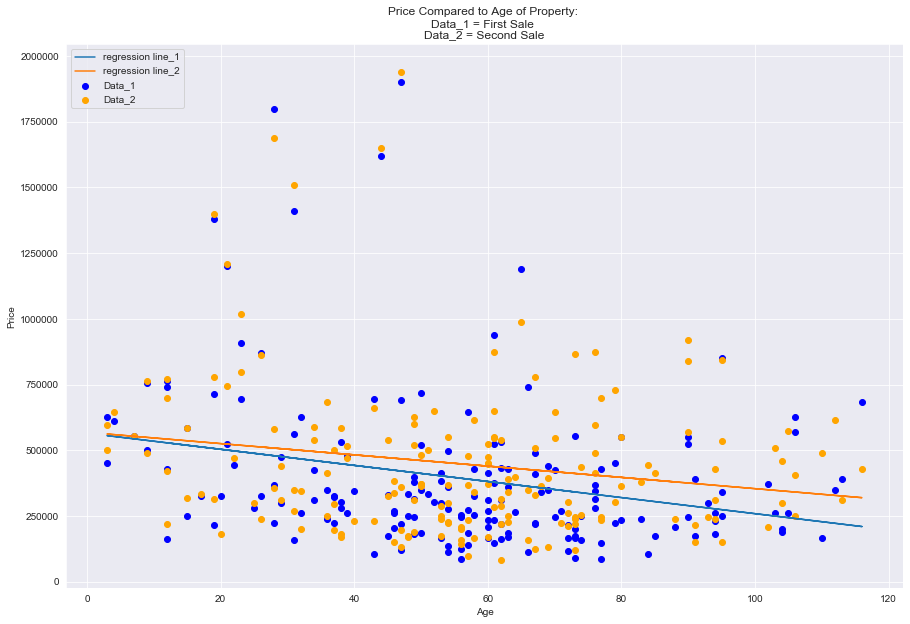

In [65]:
compare_reg_basic_and_plot(df_mulit_sale_1['age'], df_mulit_sale_1['price'], df_mulit_sale_2['age'], df_mulit_sale_2['price'], 
                           "Price Compared to Age of Property: \nData_1 = First Sale \nData_2 = Second Sale", "Age", "Price")

For houses which were sold twice, the old the house the grater the price for the second sale.

Data_1 Regression Diagnostics
----------------------------
Sample Size: 176
Slope: 277.28
Y-Intercept: -90539.9
Correlation: 0.717
R-Squared: 0.515
----------------------------
Model: Y = 277.28 * X + -90539.9


Data_2 Regression Diagnostics
----------------------------
Sample Size: 176
Slope: 273.41
Y-Intercept: -28832.33
Correlation: 0.717
R-Squared: 0.515
----------------------------
Model: Y = 273.41 * X + -28832.33


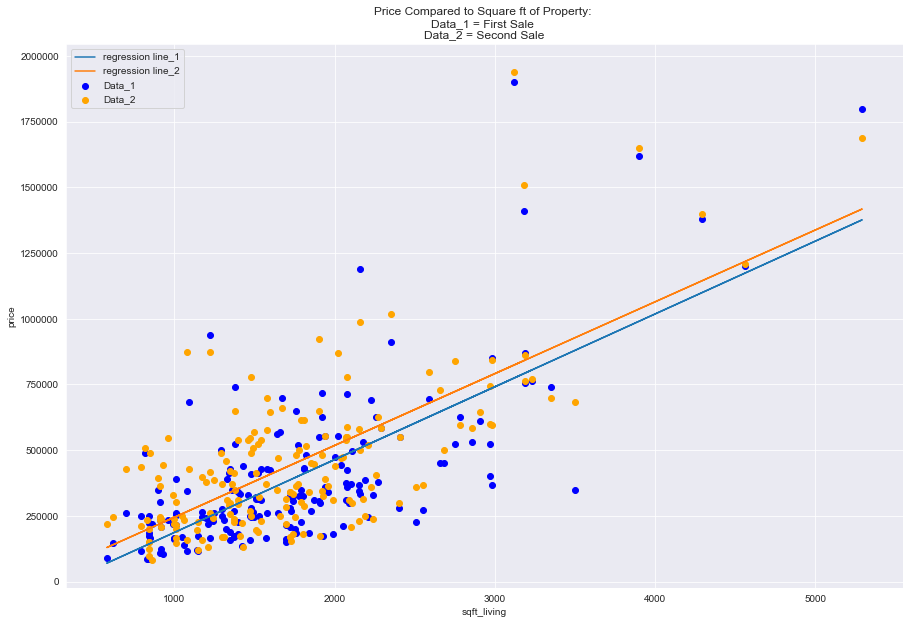

In [37]:
compare_reg_basic_and_plot(df_mulit_sale_1['sqft_living'], df_mulit_sale_1['price'], df_mulit_sale_2['sqft_living'], df_mulit_sale_2['price'], 
                           "Price Compared to Square ft of Property: \nData_1 = First Sale \nData_2 = Second Sale", "sqft_living", "price")

## Create: age since renovation column

Creating the new column

In [38]:
temp_age_since_ren = df['yr_renovated']
temp = []
i = 0
for val in temp_age_since_ren:
    if val > 0:
        val = now - df['yr_renovated'][i]
        temp.append(val)
        i += 1
    else:
        val = now - df['yr_built'][i]
        temp.append(val)
        i += 1

df['age_since_ren'] = temp

In [39]:
df['age_since_ren'].unique()

array([ 73,  51,  16,  74,  75,  27,   3,  22,  48,   8,  14,  15,  41,
        47,  30,  10,  60,  70,  38,  55,  91,  11,  29,   5,  52,  61,
        49,  63,  92,  59,  44,   2,  33,  37,  57,  17,  18,  20, 103,
        69,  94,  25,  31,  66,  13,  32,  64,  12,  35,  50,  34,  45,
        72, 116,  98,   7,  42,  39,  96,  68,  65, 105,  56,  46,  36,
        24, 114,  43,  93,  58,  67,  53,  26,  88, 110,   9,  79,  62,
        19,  23,  76,  71, 109,  95,  89,  80,  28,   6,  54,  97, 100,
       108,  40, 115,  84, 112,  86, 106,  21, 104,  77,  90, 107,  99,
        85,  83,  78, 101, 111, 113,   4,  87,  81, 102,  82,   1])

In [40]:
print(df['age'].head())
print(df['age_since_ren'].head())

date
9/9/2014     73
9/9/2014    116
9/9/2014     16
9/9/2014     74
9/9/2014     75
Name: age, dtype: int64
date
9/9/2014    73
9/9/2014    51
9/9/2014    16
9/9/2014    74
9/9/2014    75
Name: age_since_ren, dtype: int64


# Time to Renovation in Years

In [41]:
# print(df.agg({'yr_built' : ['sum', 'min', 'max', 'mean', 'median', 'mode']}))
# print(df.agg({'yr_renovated': ['sum', 'min', 'max', 'mean', 'median', 'mode']}))

In [42]:
# def time_to_renovation_cal (yr_built, yr_renovated)
#     if yr_renovated != 0:
#         Time_to_ren = yr_renovated - yr_built
#     else:
#         t

In [43]:
time_to_ren = df['yr_renovated'] - df['yr_built']
""" WARNING: if not renovated then this will = - yr_built only use this value for properties that have been renovated"""
df['time_to_ren'] = time_to_ren

In [44]:
df.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,day,month_year,price_bands,price_list_level,yr_built_bands,age,is_ren,sale_count,age_since_ren,time_to_ren
date,,,,,,,,,,,,,,,,,,,,,
9/9/2014,10904,7227800055,199500.0,4,2.00,1750,8116,1.0,0.0,0.0,...,9,9-2014,100K to 200K,2,1940,73,not_renovated,1,73,-1943
9/9/2014,12826,1421069123,214000.0,3,1.00,1020,9147,1.0,0.0,0.0,...,9,9-2014,200K to 300K,3,1900,116,renovated,1,51,65
9/9/2014,1322,3323069084,620000.0,4,2.50,1840,220308,2.0,0.0,0.0,...,9,9-2014,600K to 700K,7,2000,16,not_renovated,1,16,-2000
9/9/2014,8204,7227500450,222900.0,2,1.00,860,5800,1.0,0.0,0.0,...,9,9-2014,200K to 300K,3,1940,74,not_renovated,1,74,-1942
9/9/2014,18353,1370803445,1140000.0,4,1.75,3080,6500,1.0,0.0,0.0,...,9,9-2014,900K to 1M,10,1940,75,not_renovated,1,75,-1941


## Create new column with the "log price"

Firstly lets take a look at the price distrobution.

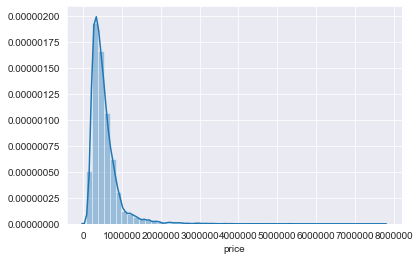

In [46]:
sns.distplot(df['price'])

In [47]:
df['log_price'] = np.log(df['price'])
df.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,month_year,price_bands,price_list_level,yr_built_bands,age,is_ren,sale_count,age_since_ren,time_to_ren,log_price
date,,,,,,,,,,,,,,,,,,,,,
9/9/2014,10904,7227800055,199500.0,4,2.00,1750,8116,1.0,0.0,0.0,...,9-2014,100K to 200K,2,1940,73,not_renovated,1,73,-1943,12.203570
9/9/2014,12826,1421069123,214000.0,3,1.00,1020,9147,1.0,0.0,0.0,...,9-2014,200K to 300K,3,1900,116,renovated,1,51,65,12.273731
9/9/2014,1322,3323069084,620000.0,4,2.50,1840,220308,2.0,0.0,0.0,...,9-2014,600K to 700K,7,2000,16,not_renovated,1,16,-2000,13.337475
9/9/2014,8204,7227500450,222900.0,2,1.00,860,5800,1.0,0.0,0.0,...,9-2014,200K to 300K,3,1940,74,not_renovated,1,74,-1942,12.314479
9/9/2014,18353,1370803445,1140000.0,4,1.75,3080,6500,1.0,0.0,0.0,...,9-2014,900K to 1M,10,1940,75,not_renovated,1,75,-1941,13.946539


Is the price is a logarithmly Scale?

In [48]:
log_price = np.log(df['price'])

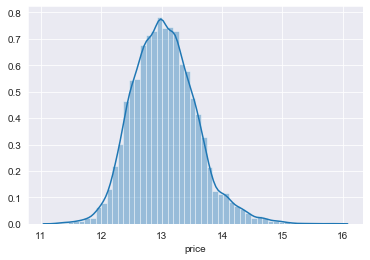

In [49]:
sns.distplot(log_price)

# 1a. Data Frame - Renovated House's



Create a new DataFrame but just for houses which have been renovated

In [50]:
df_ren = df.loc[df['yr_renovated'] != 0]

In [51]:
df_ren.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,month_year,price_bands,price_list_level,yr_built_bands,age,is_ren,sale_count,age_since_ren,time_to_ren,log_price
date,,,,,,,,,,,,,,,,,,,,,
9/9/2014,12826,1421069123,214000.0,3,1.00,1020,9147,1.0,0.0,0.0,...,9-2014,200K to 300K,3,1900,116,renovated,1,51,65,12.273731
9/9/2014,4764,4045500130,154000.0,2,1.00,1040,20524,1.0,0.0,3.0,...,9-2014,100K to 200K,2,1940,67,renovated,1,27,40,11.944708
9/8/2014,14837,2301400276,865000.0,4,2.50,2520,4950,2.0,0.0,0.0,...,8-2014,800K to 900K,9,1900,110,renovated,1,14,96,13.670485
9/8/2014,95,1483300570,905000.0,4,2.50,3300,10250,1.0,0.0,0.0,...,8-2014,900K to 1M,10,1940,70,renovated,1,25,45,13.715690
9/8/2014,5577,537000130,360000.0,1,2.25,2060,10600,1.5,0.0,0.0,...,8-2014,300K to 400K,4,1920,89,renovated,1,33,56,12.793859


In [52]:
df_ren.shape

(744, 34)

In [56]:
# g = sns.FacetGrid(df_ren, col="age",  row="grade")
# g = g.map(plt.hist, "log_price")

# 1b. DataFrame - Non_Renovated House's

There was a house that it's year built was zero so it must be excluded from this data frame.

In [54]:
df_non_ren = df.loc[(df['yr_renovated'] == 0) & (df['yr_built'] != 0)]

In [55]:
df_non_ren.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,month_year,price_bands,price_list_level,yr_built_bands,age,is_ren,sale_count,age_since_ren,time_to_ren,log_price
date,,,,,,,,,,,,,,,,,,,,,
9/9/2014,10904,7227800055,199500.0,4,2.00,1750,8116,1.0,0.0,0.0,...,9-2014,100K to 200K,2,1940,73,not_renovated,1,73,-1943,12.203570
9/9/2014,1322,3323069084,620000.0,4,2.50,1840,220308,2.0,0.0,0.0,...,9-2014,600K to 700K,7,2000,16,not_renovated,1,16,-2000,13.337475
9/9/2014,8204,7227500450,222900.0,2,1.00,860,5800,1.0,0.0,0.0,...,9-2014,200K to 300K,3,1940,74,not_renovated,1,74,-1942,12.314479
9/9/2014,18353,1370803445,1140000.0,4,1.75,3080,6500,1.0,0.0,0.0,...,9-2014,900K to 1M,10,1940,75,not_renovated,1,75,-1941,13.946539
9/9/2014,10310,325049234,925000.0,4,2.50,3110,11422,2.0,0.0,0.0,...,9-2014,900K to 1M,10,1980,27,not_renovated,1,27,-1989,13.737549


### If renovated: show the distributuion of time to renovation. 

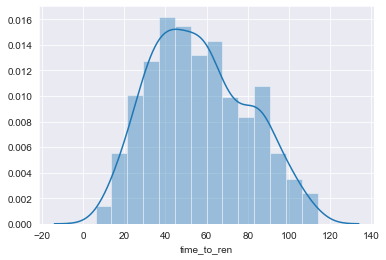

In [66]:
sns.distplot(df_ren['time_to_ren'])

Basic Regression Diagnostics
----------------------------
Sample Size: 744
Slope: 0.002
Y-Intercept: 13.241
Correlation: 0.071
R-Squared: 0.005
----------------------------
Model: Y = 0.0 * X + 13.24


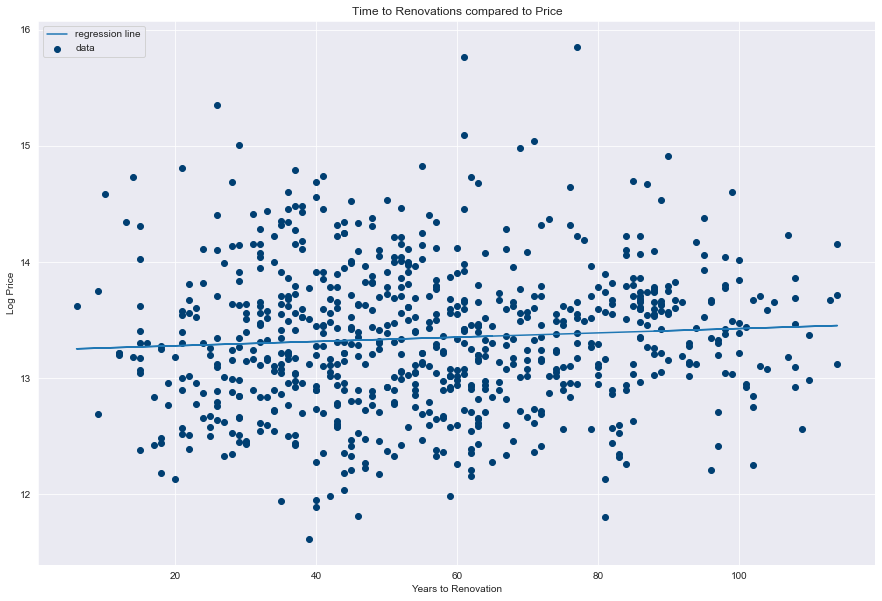

In [74]:
reg_basic_and_plot(df_ren['time_to_ren'], df_ren['log_price'], 
                   "Time to Renovations compared to Price", "Years to Renovation", "Log Price")

Price is negliagble effected by time to renovation. 

Basic Regression Diagnostics
----------------------------
Sample Size: 744
Slope: -0.002
Y-Intercept: 13.482
Correlation: -0.064
R-Squared: 0.004
----------------------------
Model: Y = -0.0 * X + 13.48


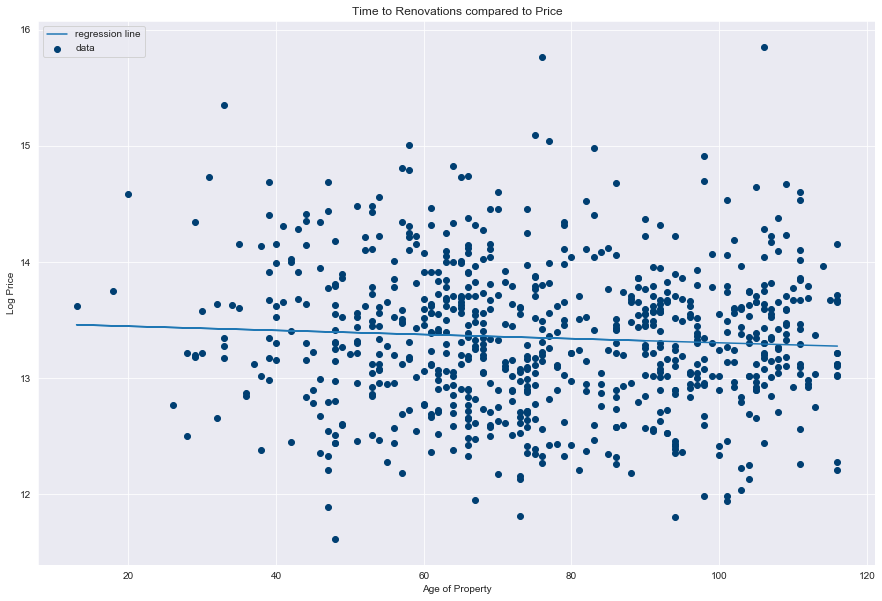

In [75]:
reg_basic_and_plot(df_ren['age'], df_ren['log_price'], 
                   "Time to Renovations compared to Price", "Age of Property", "Log Price")

# Analysis

### Datasets Sample Size 

In [76]:
total_housing_units = 902107 # From American Comunity Survey 2017
housing_units = df.shape[0]
print("Total Number of properties in KC:", total_housing_units) 
print("Total Number of properties in DataSet:", len(unique_ids))
print("Percentage of properties:", round((((len(unique_ids))/total_housing_units)*100),3),"%")

Total Number of properties in KC: 902107
Total Number of properties in DataSet: 21418
Percentage of properties: 2.374 %


# Price compared to Age of property

In [ ]:
reg_basic_and_plot(df['age'], df['log_price'], "Price compared to Age of property", "Age", "Log Price")

### Price compared to: Time since renovation or if not renovated, Time since built.

In [ ]:
reg_basic_and_plot(df['age_since_ren'], 
                   df['log_price'], 
                   "Price compared to: Time since renovation or if not renovated, Time since built.",
                  "Years Since Renovation Or Built",
                  "Log Price")

In [ ]:
compare_reg_basic_and_plot(df_non_ren['age'], df_non_ren['log_price'], 
                           df_ren['age'], df_ren['log_price'], 
                           "Price Compared to Year Built: \nData_1 = Non-Renovated \nData_2 = Renovated",
                          "Age", "Log Price",)

In [ ]:
print(df_ren['age'].median())
print(df_non_ren['age'].median())


print(df_ren['age_since_ren'].median())

# year_biuilt - year renovated  = years since renovated.

### Brake down in to Decade Class for year built

1900's:

In [83]:
df_1900 = df.loc[df['yr_built_bands'] == 1900]

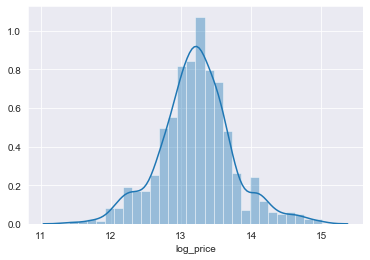

In [86]:
sns.distplot(df_1900['log_price'])

In [81]:
reg_basic_and_plot(df_1900[''], df_1900['log_price'],
                           "Grade Compare ", "Grade", "Price")

ZeroDivisionError: division by zero

### Now broken down into decade bins:

In [ ]:
sns.barplot(sorted(df['yr_built_bands']), df['price'])

In [ ]:
sns.barplot(df, df['yr_built_bands'], df['yr_renovated'])

In [ ]:
p = sns.FacetGrid(df, col=['df[price_bands]'], row=df['is_ren'])
p = p.map(plt.hist, 'age')

In [ ]:
g = sns.FacetGrid(df, 
              col=sorted(df['yr_built_bands']), 
                         row=sorted(df['price_bands']))

g = g.map(plt.scatter, "price", "age")

In [ ]:
sns.scatterplot(data=df_ren, x=df_ren['age'], y=df_ren['price'])

In [ ]:
reg_basic_and_plot(df_ren['age'], df_ren['price'], "How Price is effect by Age of the Property")

### Analysis - Renovated House's 
From the above progression it shows that for every year the price will decrease by just over $2000 . This is a substanitall amount of money but is it significant compared to houses that have not been renovated?

First though as the equation is:

    Price = (-2045.39 * Age) + 924176.48
    
So lets look at the median house age and return the price.

In [ ]:
df_ren['age'].median()

In [ ]:
-2045.39*(df_ren['age'].median()) + 924176.48

In [ ]:
df_ren.columns

In [ ]:
df_ren['time_to_ren'].mode()

Check the correlation:

In [ ]:
df_ren.corr()['log_price'].sort_values(ascending=False)

In [ ]:
sns.scatterplot(data=df_non_ren, x=df_non_ren['age'], y=df_non_ren['price'])

In [ ]:
reg_basic_and_plot(df_non_ren['age'], df_non_ren['price'], "How Price is effect by Age of the Property, If a Renovation has been done")

### Analysis - If house not Renovated:

I this case the house price does decrease, but only by $996.65 per year. 

Benifit of not renovating: re

Just checking that all the non-renovated house have year built values. As in the initial dataframe the there were yr_bulit values equal to zero.

In [ ]:
# sorted(df_non_ren['yr_built'].unique())

## Comparing the finding the mean age of the building in each zipcode.

In [ ]:
def averages_dist_comparison(average, y_condition, x_condition, title):
    stats_y_condition = df.groupby([y_condition])[x_condition].average().apply(lambda x: format(x, 'f'))
    df_stats_y_condition = pd.DataFrame(stats_y_condition)
    avaerage_y_condition = df_stats_y_condition.rename(columns={str(y_condition): str(x_condition)})
    avaerage_y_condition.x_condition = avaerage_y_condition.x_condition.astype('float64')
    df_stats_y_condition = pd.DataFrame(avaerage_y_condition)
    df_stats_y_condition.sort_values(str(y_condition).plot(kind='barh', figsize=(15,15))
    plt.title(title)

In [ ]:
averages_dist_comparison('median', 'zipcode','condition', "test")

In [ ]:
#found Mean price values of houses in each zipcode
stats_zipcode = df.groupby(['zipcode'])['age'].mean().apply(lambda x: format(x, 'f'))
df_stats_zipcode = pd.DataFrame(stats_zipcode)
mean_zipcode = df_stats_zipcode.rename(columns={"age": "mean_price"})
mean_zipcode.mean_price = mean_zipcode.mean_price.astype('float64')
df_mean_zipcode = pd.DataFrame(mean_zipcode)
df_mean_zipcode.sort_values('zipcode').plot(kind='barh', figsize=(15,15))
plt.title('Mean Price in each Zipcode')
# # df_mean_zipcode = df_stats_zipcode.rename(columns={"price": "mean_price"})
# # df2 = df_mean_zipcode['mean_price'].astype('float64')
# # sns.distplot(df_mean_zipcode)
# sns.barplot(x = ['zipcode'], y = ['mean_price'])
# # #clean this graph a little more

Check differance by median:

In [ ]:
stats_zipcode = df.groupby(['zipcode'])['age'].median().apply(lambda x: format(x, 'f'))
df_stats_zipcode = pd.DataFrame(stats_zipcode)
median_zipcode = df_stats_zipcode.rename(columns={"age": "median_price"})
median_zipcode.median_price = median_zipcode.median_price.astype('float64')
df_median_zipcode = pd.DataFrame(median_zipcode)
df_median_zipcode.sort_values('zipcode').plot(kind='barh', figsize=(15,15))
plt.title('Median Age in each Zipcode')

Look and median extra space in each zipxode

In [ ]:
stats_zipcode = df.groupby(['zipcode'])['extra_space'].median().apply(lambda x: format(x, 'f'))
df_stats_zipcode = pd.DataFrame(stats_zipcode)
median_zipcode = df_stats_zipcode.rename(columns={"zipcode": "extra_space"})
median_zipcode.extra_space = median_zipcode.extra_space.astype('float64')
df_median_zipcode = pd.DataFrame(median_zipcode)
df_median_zipcode.sort_values('zipcode').plot(kind='barh', figsize=(15,15))
plt.title('Median extra_space in each Zipcode')

In [ ]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="extra_space",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

In [ ]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="age",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

# Part 2 - Breaking the Houses Clasifications 

In this section we will be breaking down the houses into further catagorise and comapreing the non-renovated top the renovated in diffent metrics:

    2a. Price Bands
    2b. Number of Bedrooms
    2c. Number of Bathrooms
    2d. sqft_lot
    2e. sqft_living
    2f. Building Condition
    2g. Building Grade

### 2a. Price Band - Renovated

In [ ]:
sns.barplot(y=sorted(df_ren['price_bands']), x=df_ren['age']) # title="Price Bands to age of property"

In [ ]:
sns.scatterplot(y=sorted(df_ren['condition']), x=df_ren['grade'])

In [ ]:
# df_ren.set_index(df_ren['price_bands'])

In [ ]:
sns.lmplot(data=df, x="age", y="grade", hue="price_bands")

In [ ]:
sns.lmplot(data=df, x="age", y="price", hue="yr_built_bands")

In [ ]:
# reg_basic_and_plot()

## Renovated - Bedrooms

In [ ]:
sns.barplot(x=df_ren['bedrooms'], y=df_ren['price'])

## 2e. Square foot living

In [ ]:
reg_basic_and_plot(df['sqft_living'], df['price'], 'test')

In [ ]:
compare_reg_basic_and_plot(df_non_ren['sqft_living'], df_non_ren['price'], df_ren['sqft_living'], df_ren['price'], 
                           "Price Compared to sqft_living: \nData_1 = Non-Renovated \nData_2 = Renovated")

### Square foot living compared to square foot lot

In [ ]:
compare_reg_basic_and_plot(df_non_ren['sqft_living'], df_non_ren['sqft_lot'], df_ren['sqft_living'], df_ren['sqft_lot'], 
                           "Sqft_lot Compared to sqft_living: \nData_1 = Non-Renovated \nData_2 = Renovated")

This shows that living_space/lot_space  decrease if renovation is completed.

In [ ]:
df['extra_space'] = df['sqft_lot'] - df['sqft_living']

## 2f. Condition

In [ ]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="condition",
             cmap="gist_heat", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

In [ ]:
compare_reg_basic_and_plot(df_non_ren['condition'], df_non_ren['price'], 
                           df_ren['condition'], df_ren['price'], 
                           "Sqft_lot Compared to sqft_living: \nData_1 = Non-Renovated \nData_2 = Renovated",
                          "Condition", "Price")

In [ ]:
sns.distplot(df['condition'])

In [ ]:
(len(df_bad_condition)/len(df))*100

In [ ]:
902107*0.009215096087057189

In [ ]:
df['condition'].describe()

In [ ]:
df_bad_condition = df.loc[df['condition'] < 3]
df_bad_condition.describe()

In [ ]:
df_bad_condition.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Locations of bad condition houses')
plt.show()

In [ ]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="grade",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Locations of bad condition houses')
plt.show()

In [ ]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="zipcode",
             cmap="viridis", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Locations of bad condition houses')
plt.show()

In [ ]:
len(df['zipcode'].unique())

In [ ]:
stats_zipcode = df.groupby(['zipcode'])['condition'].median().apply(lambda x: format(x, 'f'))
df_stats_zipcode = pd.DataFrame(stats_zipcode)
median_zipcode = df_stats_zipcode.rename(columns={"zipcode": "condition"})
median_zipcode.extra_space = median_zipcode.condition.astype('float64')
df_median_zipcode = pd.DataFrame(median_zipcode)
df_median_zipcode.sort_values('zipcode').plot(kind='barh', figsize=(15,15))
plt.title('Median extra_space in each Zipcode')